## Importing The Libaries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os


In [44]:
print(os.listdir())

['.ipynb_checkpoints', 'GBcomments.csv', 'GBvideos.csv', 'GB_category_id.json', 'UScomments.csv', 'USvideos.csv', 'US_category_id.json', 'youtube-comments-sentiment-analysis.ipynb']


In [45]:
pd.set_option('display.max_columns',None)

## Loading The Data

In [46]:
US_comments = pd.read_csv("UScomments.csv", error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [47]:
US_videos = pd.read_csv('USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [48]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


## Let's do some analysis and Data Cleaning on both the datasets.

In [49]:
US_videos.shape

(7992, 11)

In [50]:
US_videos.nunique()

video_id          2364
title             2398
channel_title     1230
category_id         16
tags              2204
views             7939
likes             6624
dislikes          2531
comment_total     4152
thumbnail_link    2364
date                40
dtype: int64

In [51]:
US_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        7992 non-null   object 
 1   title           7992 non-null   object 
 2   channel_title   7992 non-null   object 
 3   category_id     7992 non-null   int64  
 4   tags            7992 non-null   object 
 5   views           7992 non-null   int64  
 6   likes           7992 non-null   int64  
 7   dislikes        7992 non-null   int64  
 8   comment_total   7992 non-null   int64  
 9   thumbnail_link  7992 non-null   object 
 10  date            7992 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 686.9+ KB


In [52]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [53]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [54]:
US_comments.shape

(691400, 4)

In [55]:
US_comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [56]:
US_comments.dropna(inplace=True)

In [57]:
US_comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [58]:
US_comments.shape

(691375, 4)

In [59]:
US_comments.nunique()

video_id          2266
comment_text    434076
likes             1284
replies            479
dtype: int64

In [60]:
US_comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691375 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691375 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691375 non-null  object
 3   replies       691375 non-null  object
dtypes: object(4)
memory usage: 26.4+ MB


In [61]:
US_comments.drop(41587, inplace=True)

In [62]:
US_comments = US_comments.reset_index().drop('index',axis=1)

In [63]:
US_comments.likes = US_comments.likes.astype(int)
US_comments.replies = US_comments.replies.astype(int)

In [64]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


## Removing Punctuations, Numbers and Special Characters.

In [65]:
US_comments['comment_text'] = US_comments['comment_text'].str.replace("[^a-zA-Z#]", " ")

In [66]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it s yo big day,4,0
1,XpVt6Z1Gjjo,I ve been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN attendance,3,0
4,XpVt6Z1Gjjo,trending,3,0


## Removing Short Words.

In [67]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [68]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul,4,0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0
2,XpVt6Z1Gjjo,Kong maverick,3,0
3,XpVt6Z1Gjjo,attendance,3,0
4,XpVt6Z1Gjjo,trending,3,0


## Changing the text to lower case.

In [69]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x:x.lower())

In [70]:
US_comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,logan paul,4,0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0
2,XpVt6Z1Gjjo,kong maverick,3,0
3,XpVt6Z1Gjjo,attendance,3,0
4,XpVt6Z1Gjjo,trending,3,0


## Tokenization

In [71]:
tokenized_tweet = US_comments['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                        [logan, paul]
1    [been, following, from, start, your, vine, cha...
2                                     [kong, maverick]
3                                         [attendance]
4                                           [trending]
Name: comment_text, dtype: object

## Lemmatization

In [72]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [73]:
wnl = WordNetLemmatizer()

In [74]:
tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))]) 
tokenized_tweet.head()

KeyboardInterrupt: 

In [75]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize WordNetLemmatizer and stopwords
wnl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Apply lemmatization and stopword removal
tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in stop_words])

#tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                             [logan, paul]
1            [following, start, vine, channel, seen, vlogs]
2                                          [kong, maverick]
3                                              [attendance]
4                                                [trending]
                                ...                        
691369                                                   []
691370                           [aimerais, vienne, roanne]
691371                                             [mexico]
691372                                              [yeter]
691373    [kocham, piosenk, zakochana, uszy, moja, colon...
Name: comment_text, Length: 691374, dtype: object

In [76]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [77]:
US_comments['comment_text'] = tokenized_tweet

In [78]:
US_comments['comment_text'].head()

0                                           logan paul
1    been following from start your vine channel ha...
2                                        kong maverick
3                                           attendance
4                                             trending
Name: comment_text, dtype: object

## Let's do the Sentiment Analysis on the US Comments Dataset

In [79]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [80]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

## Setting The Sentiment Scores

In [81]:
US_comments['Sentiment Scores'] = US_comments['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [82]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores
0,XpVt6Z1Gjjo,logan paul,4,0,0.0
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0
3,XpVt6Z1Gjjo,attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending,3,0,0.0


## Classifying the Sentiment scores as Positive, Negative and Neutral

In [83]:
US_comments['Sentiment'] = US_comments['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [84]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores,Sentiment
0,XpVt6Z1Gjjo,logan paul,4,0,0.0,Neutral
1,XpVt6Z1Gjjo,been following from start your vine channel ha...,3,0,0.0,Neutral
2,XpVt6Z1Gjjo,kong maverick,3,0,0.0,Neutral
3,XpVt6Z1Gjjo,attendance,3,0,0.0,Neutral
4,XpVt6Z1Gjjo,trending,3,0,0.0,Neutral


In [85]:
US_comments.Sentiment.value_counts()

Positive    305358
Neutral     260986
Negative    125030
Name: Sentiment, dtype: int64

## Now we will calculate the percentage of comments which are positive in all the videos.

In [86]:
'''videos = []
for i in range(0,US_comments.video_id.nunique()):
    a = US_comments[(US_comments.video_id == US_comments.video_id.unique()[i]) & (US_comments.Sentiment == 'Positive')].count()[0]
    b = US_comments[US_comments.video_id == US_comments.video_id.unique()[i]]['Sentiment'].value_counts().sum()
    Percentage = (a/b)*100
    videos.append(round(Percentage,2))'''


KeyboardInterrupt



In [87]:
# Assuming US_comments is a DataFrame containing 'video_id' and 'Sentiment' columns

# Initialize an empty list to store the percentages
videos = []

# Iterate over unique video_ids
for video_id in US_comments['video_id'].unique():
    # Calculate number of positive sentiments for the current video_id
    a = US_comments[(US_comments['video_id'] == video_id) & (US_comments['Sentiment'] == 'Positive')].shape[0]
    
    # Calculate total number of sentiments for the current video_id
    b = US_comments[US_comments['video_id'] == video_id].shape[0]
    
    # Calculate percentage of positive sentiments
    if b > 0:  # Avoid division by zero
        percentage = (a / b) * 100
    else:
        percentage = 0.0  # Handle case where there are no comments for the video_id
    
    # Append rounded percentage to the list
    videos.append(round(percentage, 2))

# Now 'videos' contains the list of rounded percentages of positive sentiments for each unique video_id


## Making a dataframe of the videos with their Positive Percentages.

In [88]:
Positivity = pd.DataFrame(videos,US_comments.video_id.unique()).reset_index()

In [89]:
Positivity.columns = ['video_id','Positive Percentage']

In [90]:
Positivity.head()

,video_id,Positive Percentage
0,XpVt6Z1Gjjo,34.38
1,cLdxuaxaQwc,35.54
2,WYYvHb03Eog,37.25
3,sjlHnJvXdQs,37.62
4,cMKX2tE5Luk,41.57


## Now we will add the channel name of the videos which are their in our new dataset.

In [91]:
channels = []
for i in range(0,Positivity.video_id.nunique()):
    channels.append(US_videos[US_videos.video_id == Positivity.video_id.unique()[i]]['channel_title'].unique()[0])

In [92]:
Positivity['Channel'] = channels

In [93]:
Positivity.head()

,video_id,Positive Percentage,Channel
0,XpVt6Z1Gjjo,34.38,Logan Paul Vlogs
1,cLdxuaxaQwc,35.54,PewDiePie
2,WYYvHb03Eog,37.25,The Verge
3,sjlHnJvXdQs,37.62,jacksfilms
4,cMKX2tE5Luk,41.57,A24


In [94]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].max()]

,video_id,Positive Percentage,Channel
395,cviyIIvBlto,100.0,Kerry Wong
424,jLa9wZHiqxg,100.0,Rad Universe
466,S-a8NVEUO4E,100.0,E! Live from the Red Carpet
601,wBjAmThxDpA,100.0,Vertical Entertainment LA
612,_zl2GV89_GM,100.0,Cosmic Book News
821,lJj66BCiZWQ,100.0,Eric Blattberg
972,BNRUV3TuExQ,100.0,Fathom Events
1317,zuKX0fPlo2Q,100.0,Thomas Bikias
1454,Ekc7lWx0468,100.0,The Illusion contest
1539,HjfN2Phsfng,100.0,weatherguru76


## So these are the videos and their channels whose comments are 100% Positive (Well, this might be less likely because NLTK is poor with sarcasmic comments but i can say that most of the comments are positive).

In [95]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].min()]

,video_id,Positive Percentage,Channel
117,3hq2c9vdfls,0.0,Cal Bears
151,7Ag2oDIeLvo,0.0,OsbornTramain
420,p7sooI96zPI,0.0,Geezus66
468,Oz88_p125uM,0.0,ViralVideoUK
592,BfxOimRxXvU,0.0,Andro Hack
604,k8LF_FU2luY,0.0,Bollinger Motors
611,tbDr_zAcM5g,0.0,Maharishi University of Management
629,HpxsQ1_UAec,0.0,Manto kay SO Afsanay
811,EZaPeQ2dxh8,0.0,Malhar Takle
819,D6zUj1tKxiU,0.0,Xposure 365 TV


## So these are the videos and their channels whose comments are 0% Positive (Means the comments are either Negative or Neutral. This stat is also less likely but as i said earlier, MOSTLY).

## Let's Contstruct a wordcloud of all the comments to see the most frequent comments.

In [98]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/d0/67/ebbc7e0c6da1753d7c30c2ca47c6bd11dbf2259cfa9c98151f4ab3d8b950/wordcloud-1.9.3-cp39-cp39-win_amd64.whl.metadata
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   -------------------------------------- 300.6/300.6 kB 251.2 kB/s eta 0:00:00


In [103]:
pip install matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all comments into a single string
all_words = ' '.join([text for text in US_comments['comment_text']])

# Specify the correct font path with raw string literal
font_path = r'C:\Windows\Fonts\Algerian Regular.ttf'

# Generate WordCloud with font_path
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, font_path=font_path).generate(all_words)

# Display the WordCloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


OSError: cannot open resource

In [115]:
all_words = ' '.join([text for text in US_comments['comment_text']])
from wordcloud import WordCloud
font_path = "C:\Windows\Fonts\Algerian Regular"
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, font_path=font_path).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

OSError: cannot open resource

In [ ]:
"C:\Windows\Fonts"

In [111]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming US_comments DataFrame contains 'comment_text' and 'Sentiment' columns

# Filter positive comments
positive_comments = US_comments[US_comments['Sentiment'] == 'Positive']
all_positive_words = ' '.join(positive_comments['comment_text'])

# Specify a TrueType font file path
font_path = r'C:\Windows\Fonts\Arial.tff'

# Generate WordCloud with font_path
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, font_path=font_path).generate(all_positive_words)

# Display the WordCloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


OSError: cannot open resource

## Let's Construct a Wordcloud of Positive Comments

In [112]:
all_words_posi = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Positive']])

In [113]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

## Let's Construct a Wordcloud of Negative Comments

In [50]:
all_words_nega = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Negative']])

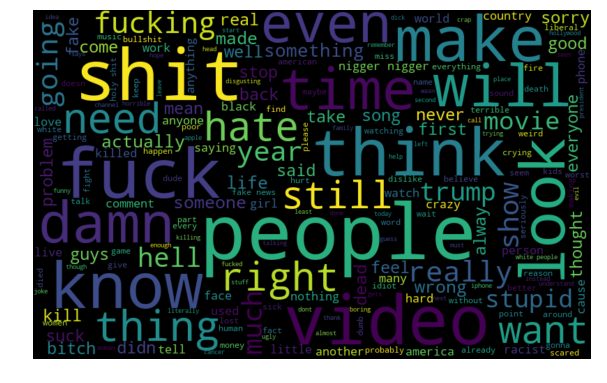

In [51]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Contsruct a Wordcloud of Neutral Comments.

In [52]:
all_words_neu = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Neutral']])

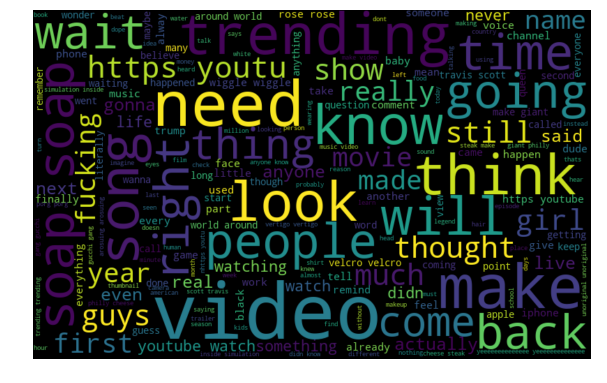

In [53]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()